In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [39]:

from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [40]:
data = pd.read_csv("daily-min-temperatures.csv")
data

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [41]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace= True)

In [42]:
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


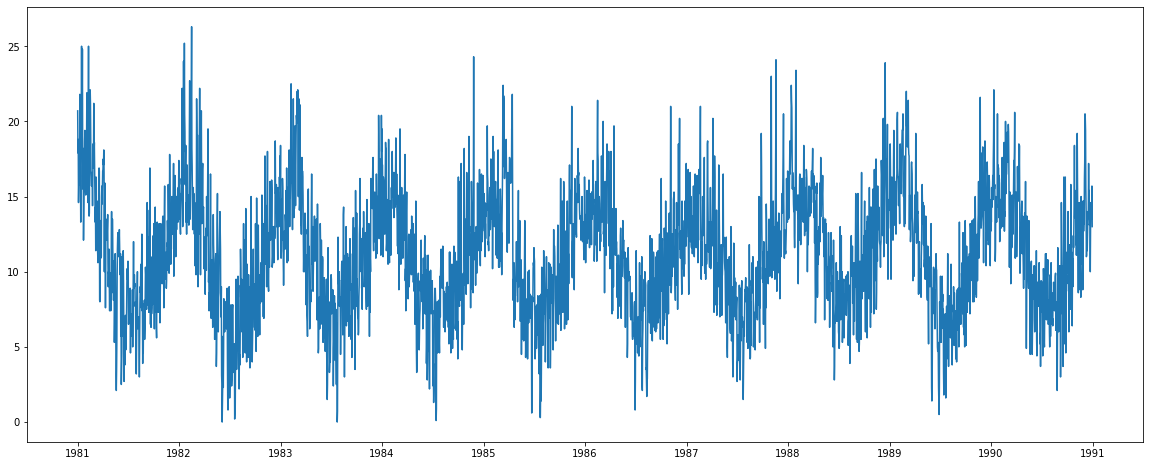

In [43]:
plt.figure(figsize=(20,8))
plt.plot(data)

# Time Series Forecast using LSTM

In [44]:
data=data.values
data = data.astype('float32')

In [45]:
data

array([[20.7],
       [17.9],
       [18.8],
       ...,
       [13.5],
       [15.7],
       [13. ]], dtype=float32)

In [46]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(data)

In [47]:
len(sc)

3650

In [48]:
len(data)

3650

In [69]:
test_precent=0.05

In [70]:
test_precent*len(data)

182.5

In [71]:
test_point=np.round(len(data)*test_precent)
test_point

182.0

In [72]:
test_indx=int(len(data)-test_point)
test_indx

3468

In [73]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


Xtrain = X[:test_indx,:,:]
Xtest = X[test_indx:,:,:]    
Ytrain = Y[:test_indx]    
Ytest= Y[test_indx:]   

In [74]:
print(Xtrain.shape)
print(Xtest.shape)

(3468, 30, 1)
(152, 30, 1)


In [75]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 32)            4352      
                                                                 
 lstm_4 (LSTM)               (None, 30, 32)            8320      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,025
Trainable params: 21,025
Non-trainable params: 0
_________________________________________________________________


In [77]:
model.fit(Xtrain,Ytrain,epochs=50, verbose=1)

Epoch 1/50
109/109 [==============================] - 5s 23ms/step - loss: 0.0584
Epoch 2/50
109/109 [==============================] - 2s 23ms/step - loss: 0.0458: 1
Epoch 3/50
109/109 [==============================] - 2s 22ms/step - loss: 0.0451
Epoch 4/50
109/109 [==============================] - 2s 21ms/step - loss: 0.0448
Epoch 5/50
109/109 [==============================] - 2s 22ms/step - loss: 0.0421
Epoch 6/50
109/109 [==============================] - 2s 22ms/step - loss: 0.0398
Epoch 7/50
109/109 [==============================] - 2s 21ms/step - loss: 0.0351
Epoch 8/50
109/109 [==============================] - 2s 22ms/step - loss: 0.0345: 1s - ETA: 0s - loss: 0.
Epoch 9/50
109/109 [==============================] - 2s 21ms/step - loss: 0.0343
Epoch 10/50
109/109 [==============================] - 2s 21ms/step - loss: 0.0344
Epoch 11/50
109/109 [==============================] - 2s 22ms/step - loss: 0.0344
Epoch 12/50
109/109 [==============================] - 2s 22ms/step 

In [78]:
losses=pd.DataFrame(model.history.history)
losses.head()

,loss
0,0.058438
1,0.045799
2,0.045101
3,0.044754
4,0.042080


<AxesSubplot:>

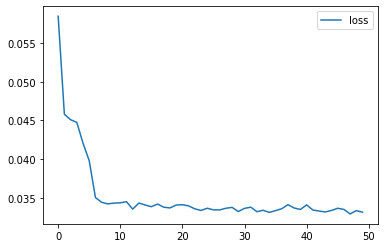

In [79]:
losses.plot()

In [80]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

5.8872437

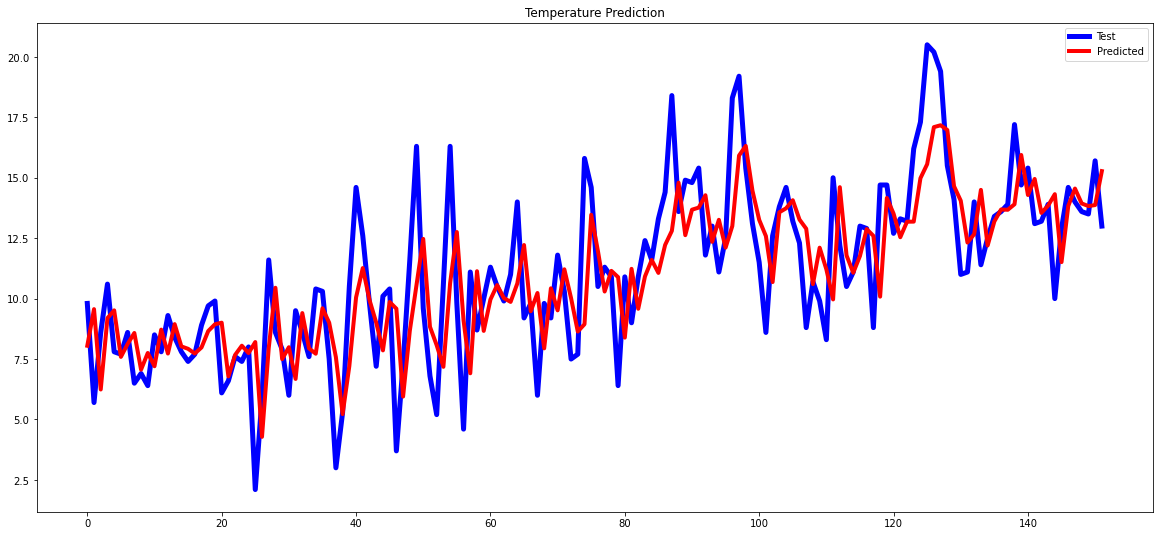

In [83]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("Temperature Prediction")
plt.show()